# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [2]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/chellee18/DataMining/refs/heads/main/Week4/penguins_size.csv')
df.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
311,Gentoo,Biscoe,52.2,17.1,228.0,5400.0,MALE
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,FEMALE
163,Chinstrap,Dream,51.7,20.3,194.0,3775.0,MALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,FEMALE
21,Adelie,Biscoe,37.7,18.7,180.0,3600.0,MALE
262,Gentoo,Biscoe,45.3,13.7,210.0,4300.0,FEMALE
124,Adelie,Torgersen,35.2,15.9,186.0,3050.0,FEMALE
270,Gentoo,Biscoe,46.6,14.2,210.0,4850.0,FEMALE
284,Gentoo,Biscoe,45.8,14.2,219.0,4700.0,FEMALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [4]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [5]:
col_names = ['species', 'island', 'sex']

for col in col_names:
    
    print(df[col].value_counts())

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64
Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64
MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64


5. Drop the null column(s)

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

6. Change the value "." in sex column, try to predict it based on other features (try to groupby 'sex' with Gentoo species in describe)

In [7]:
df.loc[(df['species'] == 'Gentoo') & (df['sex'] == '.')]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [8]:
df[df['species'] == 'Gentoo' ].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [9]:
df.loc[(df['species'] == 'Gentoo') & (df['sex'] == '.'), 'sex'] = 'FEMALE'

(df.loc[336])

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

7. Create your own insightful visualization and explain it in at least 2 sentences

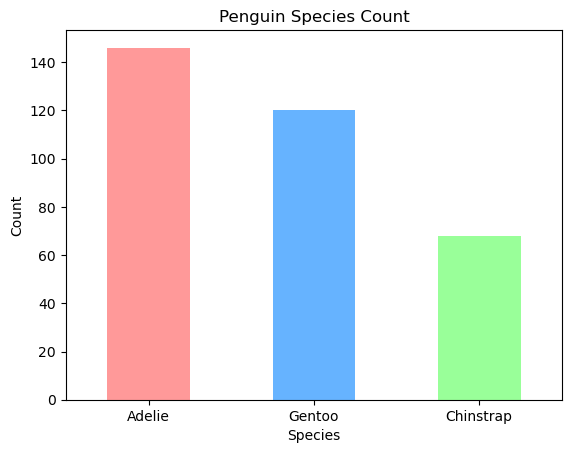

In [10]:
species_counts = df['species'].value_counts()

species_counts.plot(kind='bar', color=['#FF9999', '#66B3FF', '#99FF99'])
plt.title('Penguin Species Count')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#Plot ini memvisualisasikan jumlah penguin untuk setiap spesies dalam set data. 
#Plot ini memberikan gambaran yang jelas mengenai distribusi spesies, menunjukkan spesies mana yang lebih umum.

8. Check unique value of our target variable

In [11]:
unique_species = df['species'].unique()

print(unique_species)

['Adelie' 'Chinstrap' 'Gentoo']


9. encode categorical columns and display the results

In [12]:
label_encoder = LabelEncoder()

df['island'] = label_encoder.fit_transform(df['island'])
df['sex'] = label_encoder.fit_transform(df['sex'].astype(str)) 

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,1
1,Adelie,2,39.5,17.4,186.0,3800.0,0
2,Adelie,2,40.3,18.0,195.0,3250.0,0
4,Adelie,2,36.7,19.3,193.0,3450.0,0
5,Adelie,2,39.3,20.6,190.0,3650.0,1


10. encode the target column and display the results

In [13]:
label_encoder = LabelEncoder()

df['species'] = label_encoder.fit_transform(df['species'])
df['island'] = label_encoder.fit_transform(df['island'])
df['sex'] = label_encoder.fit_transform(df['sex'].astype(str))  

# Display the encoded DataFrame
df.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


11. create a heatmap to see the correlation and explain the conclusion

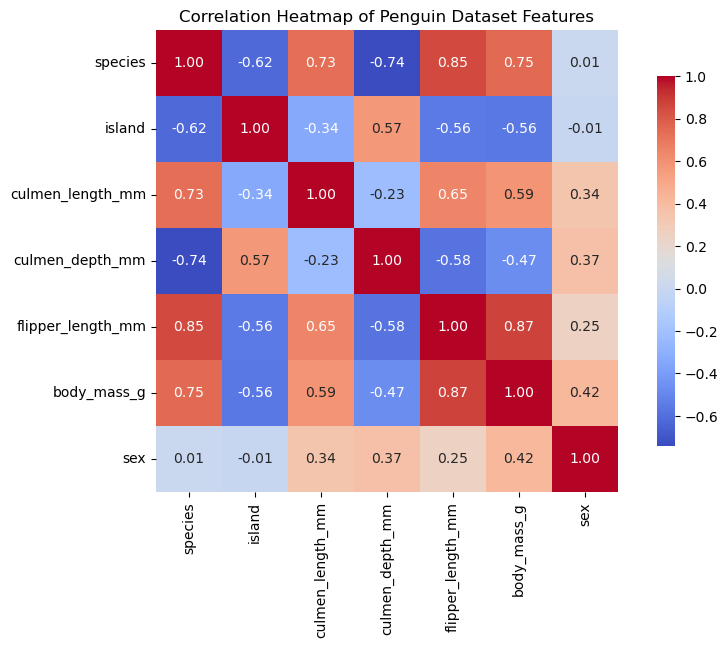

In [14]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})

# Add titles and labels
plt.title("Correlation Heatmap of Penguin Dataset Features")
plt.show()

## Machine Learning

1. Splitting X and y

In [15]:
X = df.drop('species', axis=1)
y = df['species'] 

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [17]:
X_train.shape, X_test.shape

((267, 6), (67, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [18]:
#a. Defining the model 
clf_en = DecisionTreeClassifier (criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [19]:
#b. Predict the test set results
y_pred_en = clf_en.predict(X_test)

In [20]:
#c. Check accuracy score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format (accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9701


In [21]:
#d. Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9625
Test set score: 0.9701


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\nentropy = 1.524\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 42.35\nentropy = 0.938\nsamples = 164\nvalue = [113, 50, 1]'),
 Text(0.16666666666666666, 0.375, 'x[2] <= 16.7\nentropy = 0.078\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.592\nsamples = 7\nvalue = [6, 1, 0]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 98\nvalue = [98, 0, 0]'),
 Text(0.5, 0.375, 'x[4] <= 4075.0\nentropy = 0.736\nsamples = 59\nvalue = [9, 49, 1]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.159\nsamples = 43\nvalue = [1, 42, 0]'),
 Text(0.5833333333333334, 0.125, 'entropy = 1.272\nsamples = 16\nvalue = [8, 7, 1]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\nentropy = 0.417\nsamples = 103\nvalue = [2, 5, 96]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(0.8333333333333334, 0.375, 'x[1] <= 46.55\nentropy = 0.863\nsamples = 7\nvalue = [2, 5,

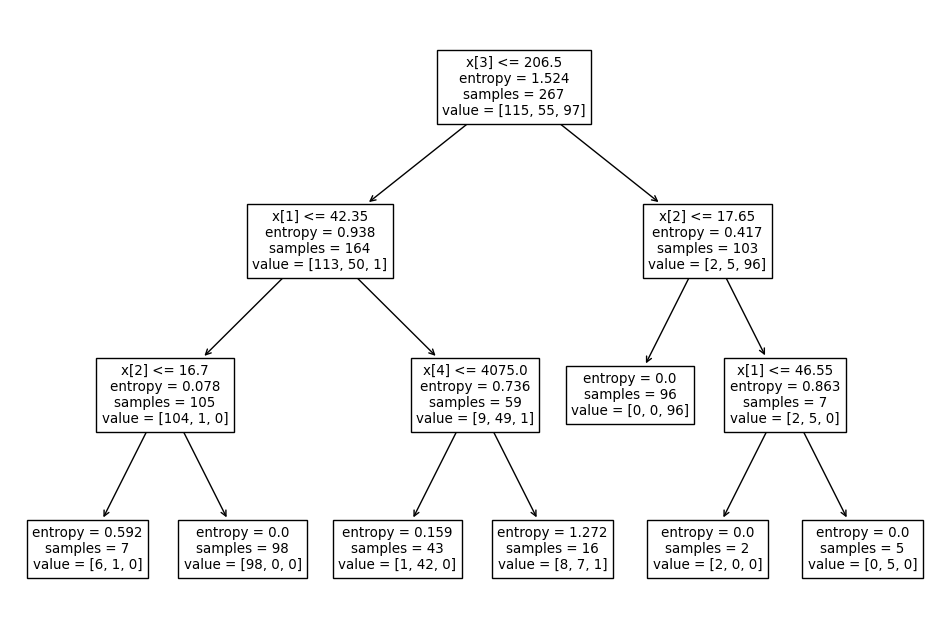

In [22]:
#e. Visualize decision trees
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train))

2. Criterion Gini index

In [23]:
#a. Defining the model 
clf_gini = DecisionTreeClassifier (criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [24]:
#b. Predict the test set results
y_pred_gini = clf_gini.predict(X_test)

In [25]:
#c. Check accuracy score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format (accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion entropy: 0.9851


In [26]:
#d. Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9738
Test set score: 0.9851


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\ngini = 0.64\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 43.35\ngini = 0.432\nsamples = 164\nvalue = [113, 50, 1]'),
 Text(0.16666666666666666, 0.375, 'x[1] <= 42.35\ngini = 0.068\nsamples = 113\nvalue = [109, 4, 0]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.019\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.25, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.5, 0.375, 'x[0] <= 1.5\ngini = 0.18\nsamples = 51\nvalue = [4, 46, 1]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.117\nsamples = 49\nvalue = [2, 46, 1]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\ngini = 0.129\nsamples = 103\nvalue = [2, 5, 96]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(0.8333333333333334, 0.375, 'x[1] <= 46.55\ngini = 0.408\nsamples = 7\nvalue = [2, 5, 0]'),
 Text(0.75, 0.125, 'gini = 0.

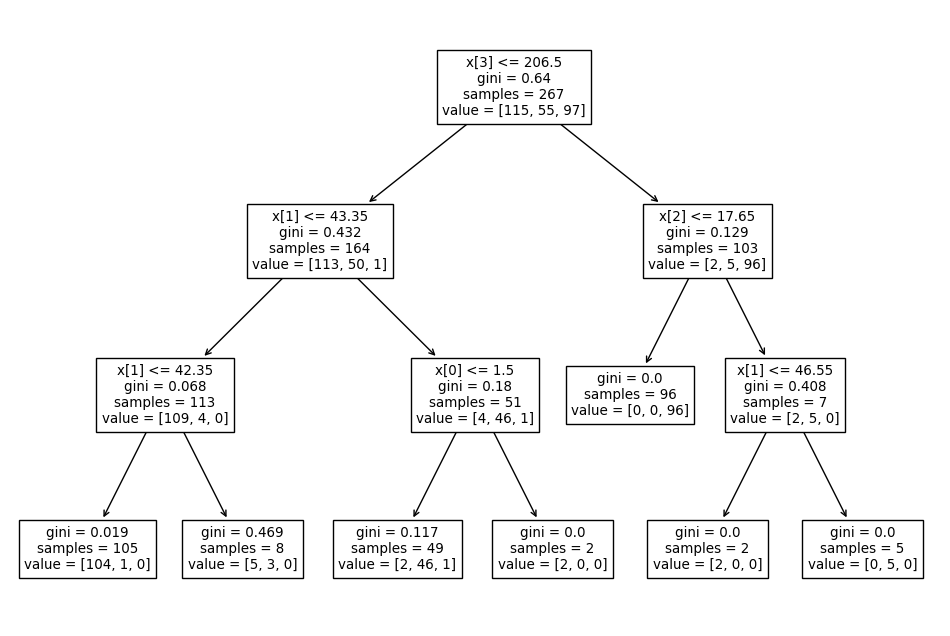

In [27]:
#e. Visualize decision trees
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train))

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [28]:
#f. Confusion matrix
cm_en = confusion_matrix(y_test, y_pred_en)
print("Confusion Matrix Entropy:")
print(cm_en)

cm_gini = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix Gini Index:")
print(cm_gini)

Confusion Matrix Entropy:
[[30  1  0]
 [ 1 12  0]
 [ 0  0 23]]
Confusion Matrix Gini Index:
[[31  0  0]
 [ 1 12  0]
 [ 0  0 23]]


In [29]:
#g. Classification Report
print("Classification Report Entropy")
print(classification_report(y_test, y_pred_en))

print("\nClassification Report Gini Index")
print(classification_report(y_test, y_pred_gini))

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00        23

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67


Classification Report Gini Index
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



In [30]:
#h. Result and Conclusion
#Model Decision Tree dengan kriteria Entropy mencapai akurasi 97%, sedangkan dengan Gini Index mencapai 99%. 
#Model Gini lebih akurat, dengan sedikit kesalahan pada kelas 1, sementara Entropy membuat satu kesalahan pada kelas 0 dan 1. 
#Secara keseluruhan, kriteria Gini memberikan hasil yang lebih baik dalam hal akurasi dan prediksi yang lebih tepat.

## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [31]:
#a. Defining the model
nb_classifier = GaussianNB()
nb_classifier.fit (X_train, y_train)

GaussianNB()

In [32]:
#b. Predict the test set results
nb_y_pred = nb_classifier.predict(X_test)

In [33]:
#c. check accuracy score
cm = confusion_matrix(y_test, nb_y_pred)
accuracy = accuracy_score(y_test, nb_y_pred)

#d. confusion matrix
print("Confusion Matrix:")
print(cm)
print("Accuracy Score:", accuracy)

Confusion Matrix:
[[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]
Accuracy Score: 1.0


In [34]:
#e. Classification report
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [35]:
#f. Result and conclusion
#Model Gaussian Naive Bayes menghasilkan akurasi sempurna (100%) pada dataset uji, 
#dengan semua sampel diklasifikasikan dengan benar dan confusion matrix yang bersih. Precision, recall, 
#dan F1-score untuk setiap kelas juga mencapai nilai maksimal. Hasil ini menunjukkan kinerja yang sangat baik, 
#meskipun akurasi sempurna mungkin mengindikasikan kemungkinan overfitting dan perlu diuji lebih lanjut pada dataset lain.

Good Luck :)